##  **Grade Buddy** ##

In [109]:
!pip3 install -U ucimlrepo 

In [27]:
list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [59]:
from ucimlrepo import fetch_ucirepo

student_data = fetch_ucirepo(id=320) #Fetching data from Dataset Name : "Student performance" which has the ID# 320, we found that above

df = student_data.data.original
print(df.head()) #It just shows the first five rows of a dataset to make it a clean preview 
print(df.tail()) #It just shows the last five rows of a dataset to make it a clean preview 

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
644     M

## **Exploratory Data Analysis (EDA)** ##

## Descriptive Statistics ##

Step 1: Understanding the data 

In [169]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
#Checking the shape of our dataset

df.shape #Gives rows and colums 

(649, 33)

In [159]:
#Describing the dataset 

df.describe() #Output does not include anything with string data 

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [163]:
df.median(numeric_only=True) #numeric_only=True is important so that our non-numeric values dont throw an errow

age           17.0
Medu           2.0
Fedu           2.0
traveltime     1.0
studytime      2.0
failures       0.0
famrel         4.0
freetime       3.0
goout          3.0
Dalc           1.0
Walc           2.0
health         4.0
absences       2.0
G1            11.0
G2            11.0
G3            12.0
dtype: float64

In [78]:
df.columns #Listing down the columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [84]:
df.nunique() #checking for unique values such as two unique values for school, two unique values for sex : male and female 

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      24
G1            17
G2            16
G3            17
dtype: int64

In [102]:
#Uniqueness can be checked for particular variable as well

df['sex'].unique() #This highlights the important difference between nunique() function and unique() function 

array(['F', 'M'], dtype=object)

In [104]:
#More checking : 

df['absences'].unique()

array([ 4,  2,  6,  0, 10,  8, 16, 14,  1, 12, 24, 22, 32, 30, 21, 15,  9,
       18, 26,  7, 11,  5, 13,  3])

Step 2 : Cleaning the data

In [139]:
#Check for null values and sum() gives how many null values for each column 

df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [150]:
#Calculating correlation before Dropping some variables that dont correlate enough with the G3 

df[['Medu', 'Fedu', 'G3']].corr() #Calculating correlation with G3 instead of making random assumptions 


,Medu,Fedu,G3
Medu,1.000000,0.647477,0.240151
Fedu,0.647477,1.000000,0.211800
G3,0.240151,0.211800,1.000000


In [152]:
#Here, I decided to drop Mjob, Fjob, Guardian and Pstatus because they don't seem to have enough correlation with the G3
student = df.drop(['Mjob','Fjob', 'guardian','Pstatus'], axis=1)
print(student.head())

  school sex  age address famsize  Medu  Fedu  reason  traveltime  studytime  \
0     GP   F   18       U     GT3     4     4  course           2          2   
1     GP   F   17       U     GT3     1     1  course           1          2   
2     GP   F   15       U     LE3     1     1   other           1          2   
3     GP   F   15       U     GT3     4     2    home           1          3   
4     GP   F   16       U     GT3     3     3    home           1          2   

   ...  famrel freetime goout Dalc Walc health absences  G1  G2  G3  
0  ...       4        3     4    1    1      3        4   0  11  11  
1  ...       5        3     3    1    1      3        2   9  11  11  
2  ...       4        3     2    2    3      3        6  12  13  12  
3  ...       3        2     2    1    1      5        0  14  14  14  
4  ...       4        3     2    1    2      5        0  11  13  13  

[5 rows x 29 columns]


Step 3 : Relationship Analysis

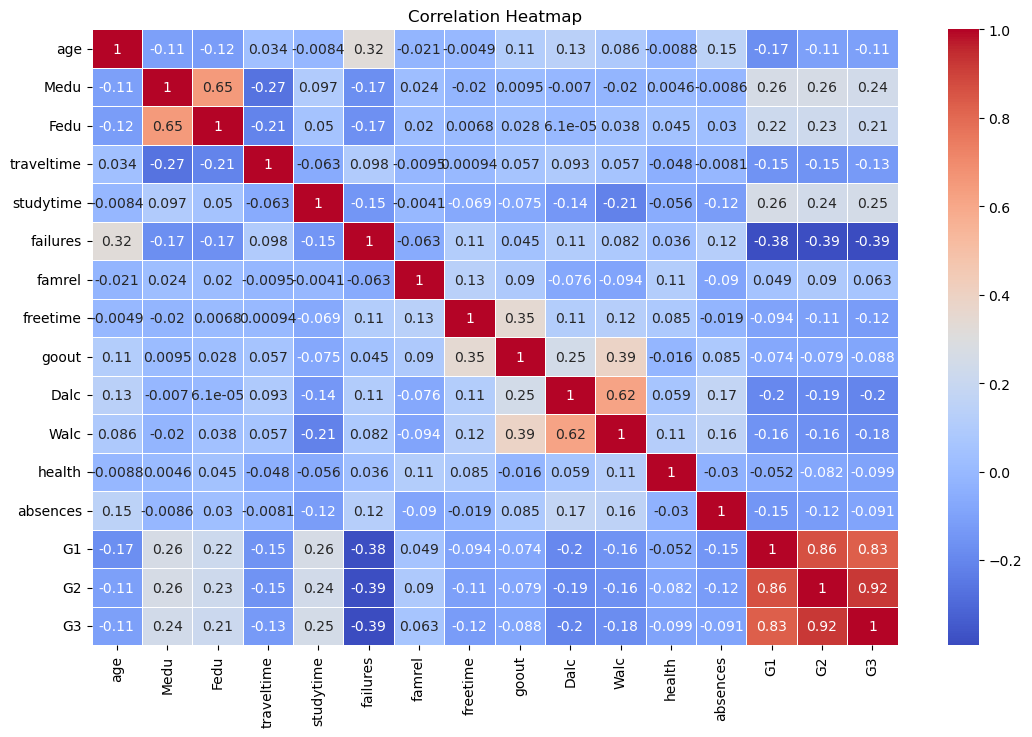

In [192]:
correlation_showcase = student.corr(numeric_only=True)
plt.figure(figsize=(13,8))
sns.heatmap(correlation_showcase, xticklabels=correlation_showcase.columns, yticklabels=correlation_showcase.columns, annot=True, 
            cmap='coolwarm',linewidth=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#Correlation Heatmap Analysis  : 
#Out of various correlations, G2 which is the second term grade has the strongest positive correlation with G3 at approximately 0.92. 
#This indicates students who perform well in the second term are very likely to score high in the final grade 

#G1 which is the first term grade also shows a very strong correlation with G3 at approximately 0.83 confirming that early performance is a 
#major indicator of final success.

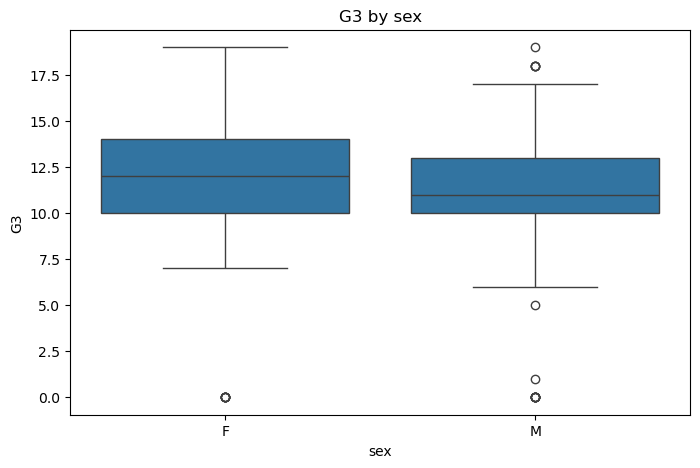

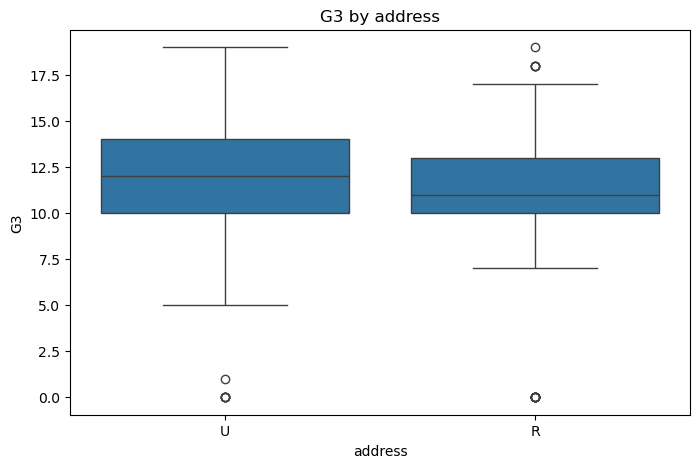

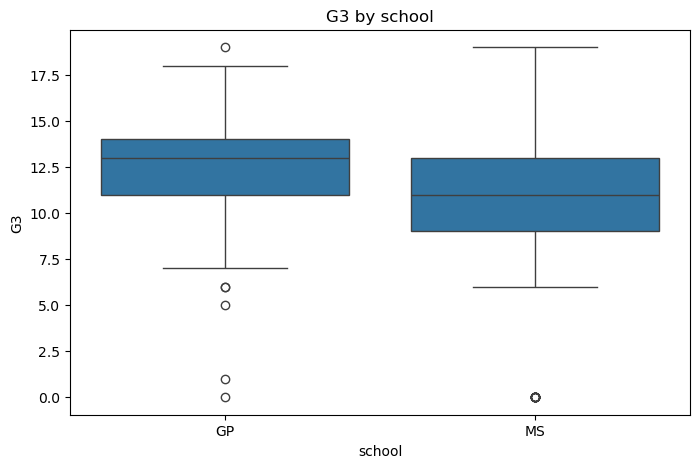

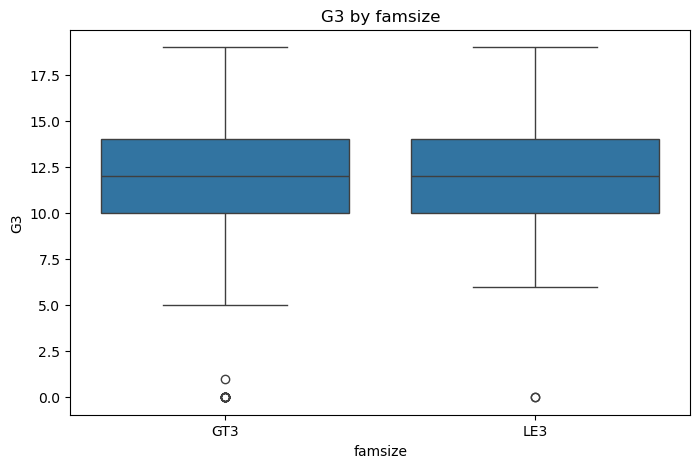

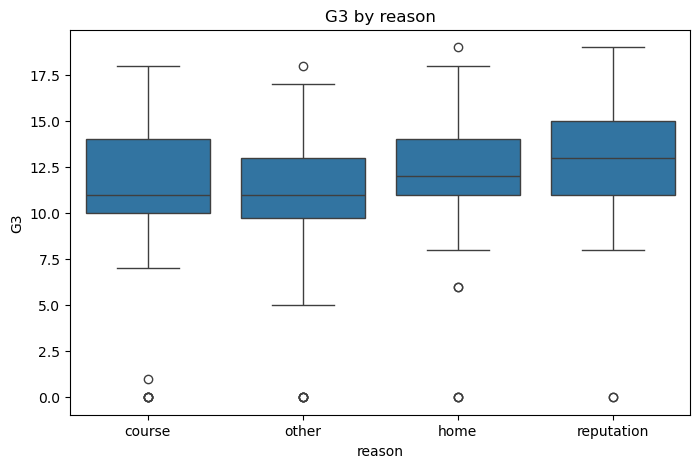

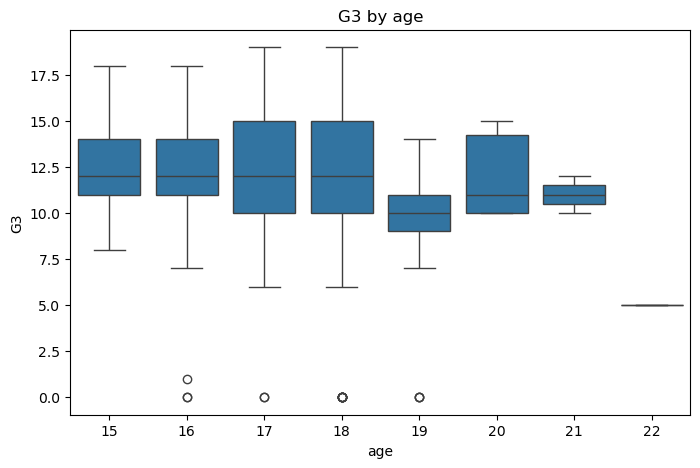

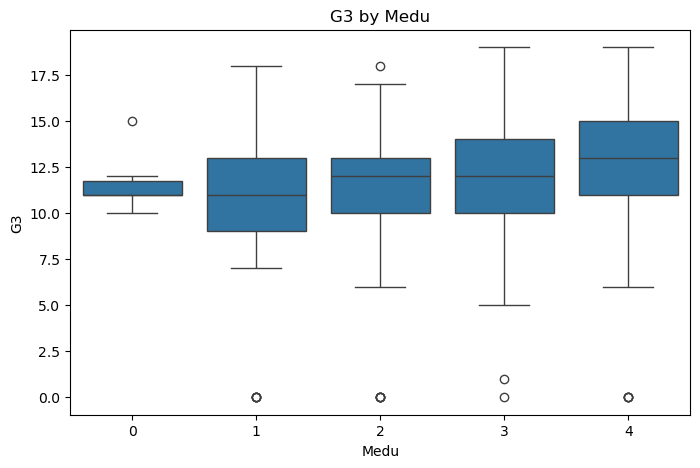

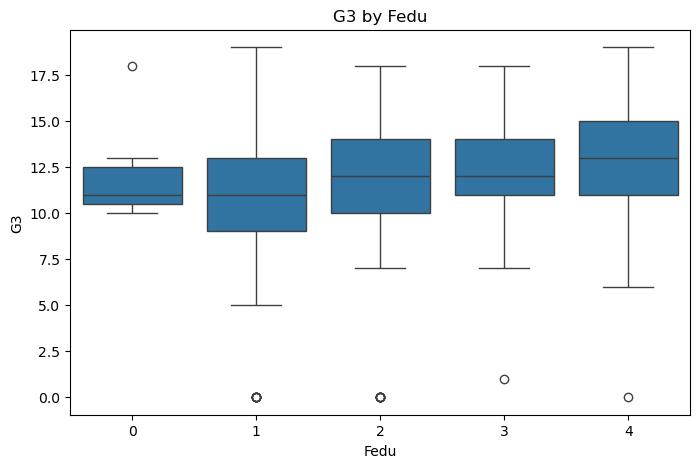

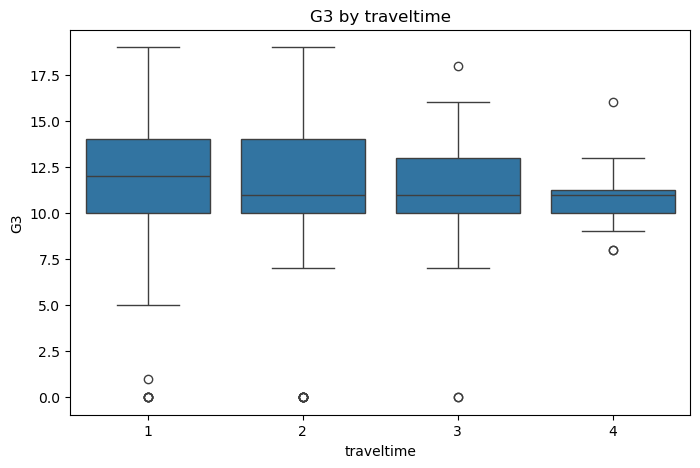

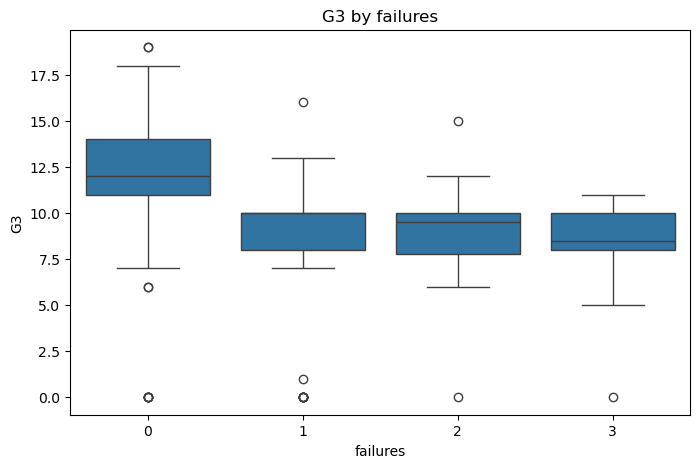

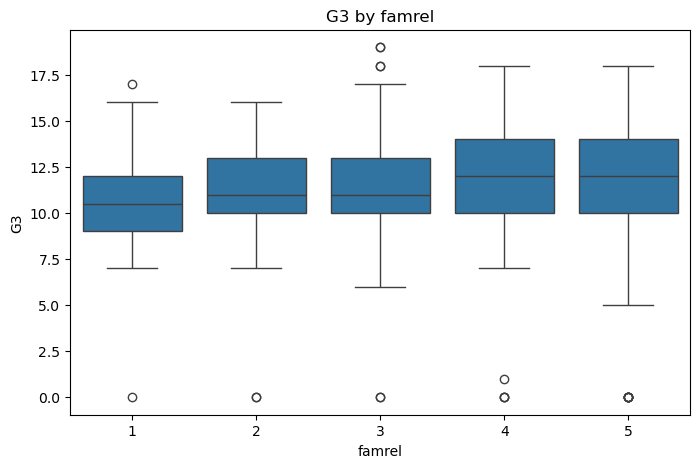

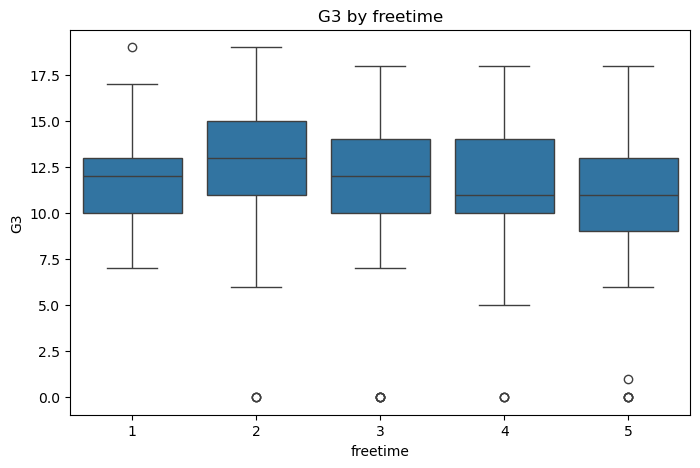

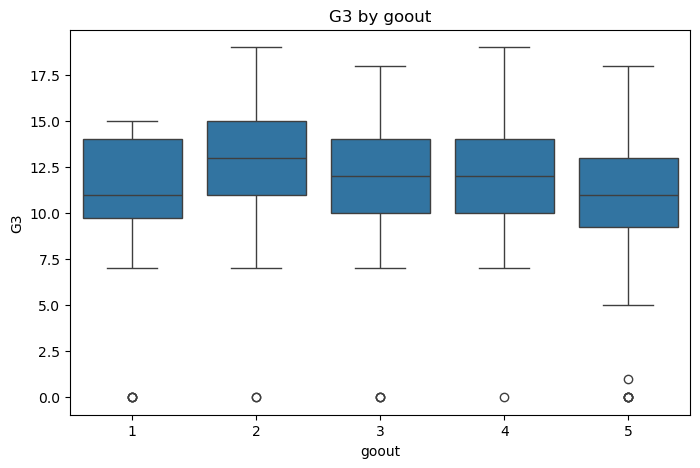

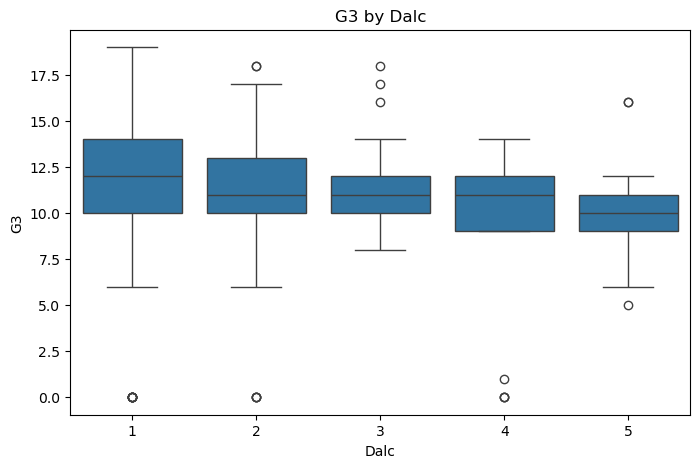

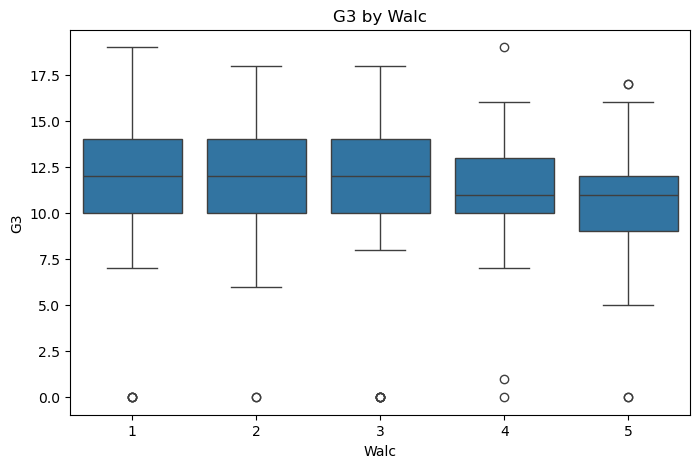

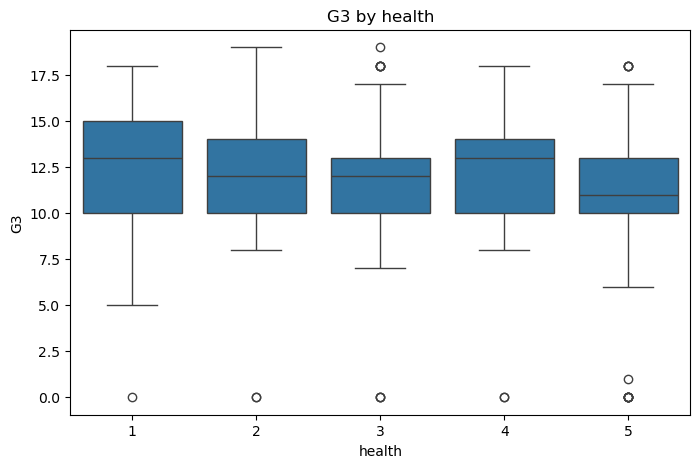

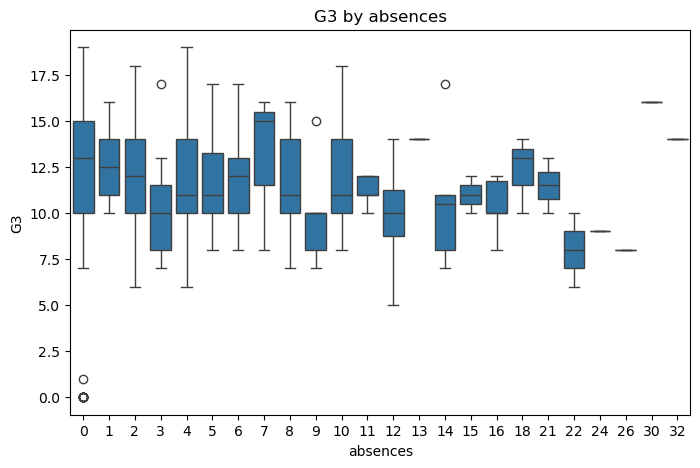

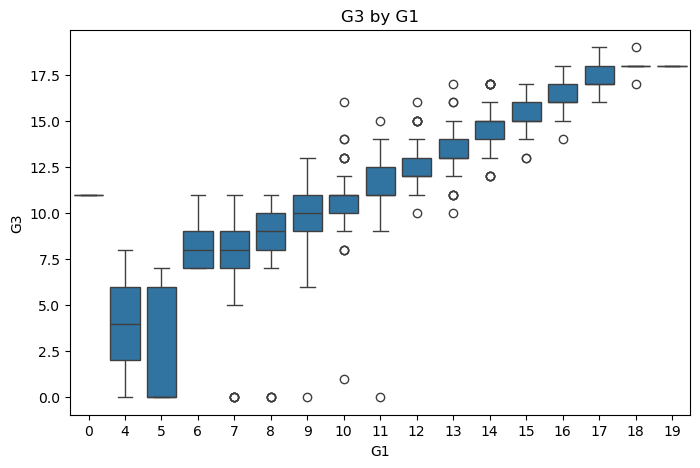

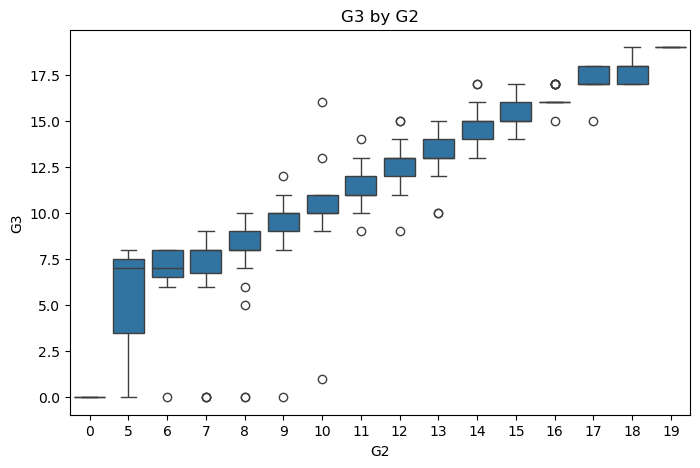

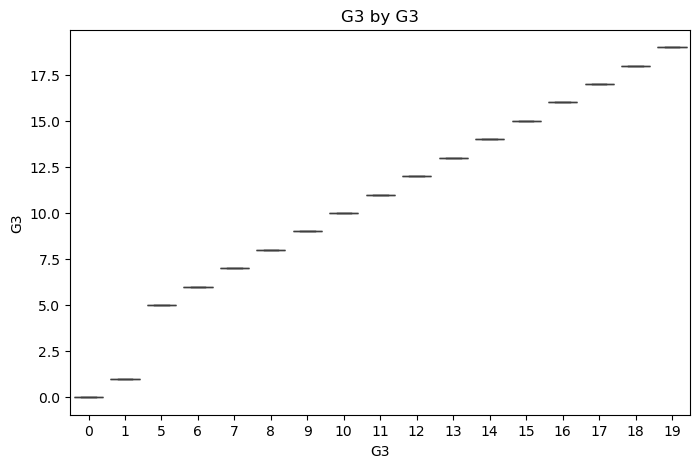

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ['sex','address','school','famsize','reason','age', 'Medu', 'Fedu', 'traveltime', 'failures', 'famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3']

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=feature, y='G3', data=df)
    plt.title(f'G3 by {feature}')
    plt.show()


## Data Preprocessing ##

Step 1 : Encoding Categorical Values

In [323]:
print(df.columns)
 

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other'],
      dtype='object')


In [227]:
label_columns = ['school','sex','address','famsize', 'Pstatus', 'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

for label in label_columns:
    df[label]=df[label].map({'yes':1,'no':0,'F':0,'M':1,'U':1,'R':0,'LE3':0,'GT3':1,'T':1,'A':0})
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other'],
      dtype='object')


Step 2 : Normalization or Standardization of numerical features

In [237]:
from sklearn.preprocessing import MinMaxScaler #This imports MinMaxScaler from scikit-learn  

numeric_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
                'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 
                'absences', 'G1', 'G2'] #We will be normalizing numeric columns only 

scaler = MinMaxScaler()  #This scales all values between 0 and 1 

df[numeric_columns] = scaler.fit_transform(df[numeric_columns]) 


Step 3 : Feature Importance Analysis

In [325]:
from sklearn.feature_selection import SelectKBest, f_regression


X = df.drop(columns=['G3'])
y = df['G3']


X = X.fillna(0)


selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)


scores = selector.scores_


import pandas as pd
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)


print(feature_scores)


              Feature        Score
27                 G2  3493.281566
26                 G1  1393.466713
10           failures   118.406123
9           studytime    43.055598
6                Medu    39.597729
7                Fedu    30.386973
22               Dalc    28.301925
23               Walc    20.832519
38  reason_reputation    19.475642
31       Mjob_teacher    11.994103
37       reason_other    11.575608
8          traveltime    10.635922
35       Fjob_teacher    10.423399
20           freetime     9.890471
2                 age     7.423385
28        Mjob_health     6.700670
24             health     6.384592
25           absences     5.448027
21              goout     5.008006
40     guardian_other     4.244318
19             famrel     2.607937
29         Mjob_other     2.279405
34      Fjob_services     1.836644
36        reason_home     1.404247
32        Fjob_health     0.992789
30      Mjob_services     0.957788
33         Fjob_other     0.018183
39    guardian_mothe

In [ ]:
#This in the above shows how strongly each feature is correlated with the target variable (G3) 

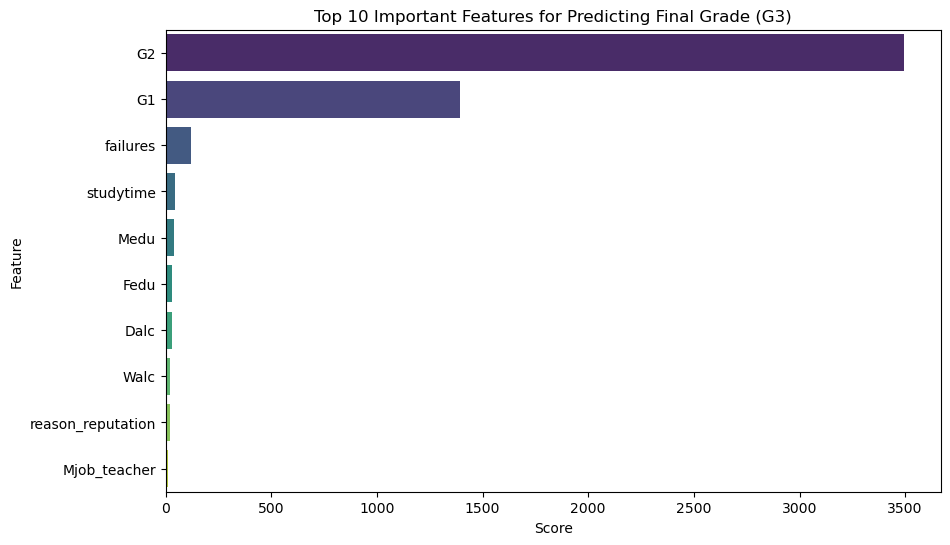

In [327]:
import seaborn as sns
import matplotlib.pyplot as plt

top_ten_features = feature_scores.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=top_ten_features, hue='Feature', dodge=False, palette='viridis')
plt.title('Top 10 Important Features for Predicting Final Grade (G3)')
plt.show()


## **Model Training and Performance Output** ##

In [255]:
from sklearn.linear_model import LinearRegression #Here we imported all the necessary libraries 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [259]:
#Time to split the data into two sets : Training set and Testing set which is normally done in 80-20 method 
X = df.drop('G3', axis=1)
y = df['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Linear Regression Training 

In [270]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [278]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Performance Matrix 

In [329]:
# Making predictions
y_pred = model.predict(X_test)

# Evaluating performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 1.44
R² Score: 0.85


## **Visualizations of Model Performance** ## 

# Actual vs. Predicted Grades Scatter Plot 

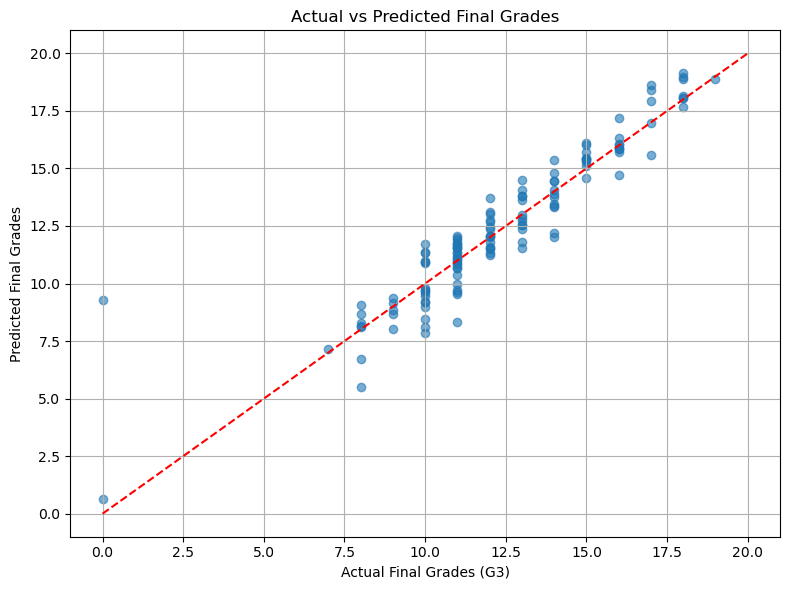

In [285]:
#plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([0, 20], [0, 20], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel("Actual Final Grades (G3)")
plt.ylabel("Predicted Final Grades")
plt.title("Actual vs Predicted Final Grades")
plt.grid(True)
plt.tight_layout()
plt.show()

Additional Decision Tree Regressor 


In [297]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

tree_preds = tree_model.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score

tree_mse = mean_squared_error(y_test, tree_preds)
tree_r2 = r2_score(y_test, tree_preds)

print(f"Decision Tree MSE: {tree_mse:.2f}")
print(f"Decision Tree R² Score: {tree_r2:.2f}")



Decision Tree MSE: 3.97
Decision Tree R² Score: 0.59


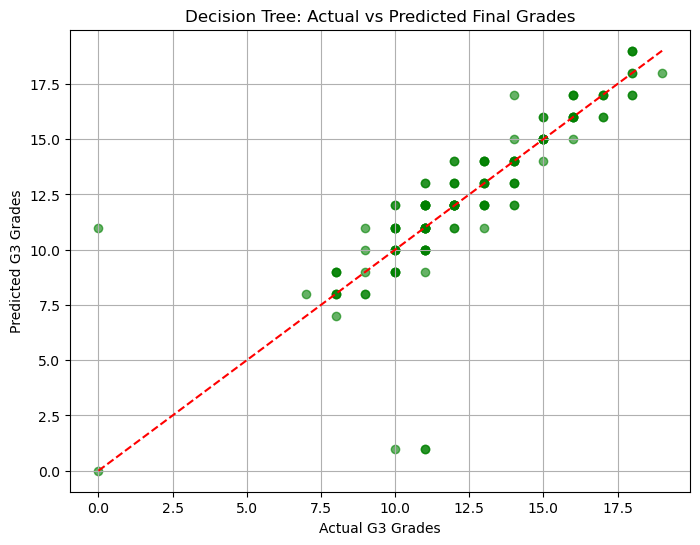

In [301]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, tree_preds, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual G3 Grades")
plt.ylabel("Predicted G3 Grades")
plt.title("Decision Tree: Actual vs Predicted Final Grades")
plt.grid(True)
plt.show()


In [305]:
print(f"Decision Tree MSE: {tree_mse:.2f}")
print(f"Decision Tree R² Score: {tree_r2:.2f}")


Decision Tree MSE: 3.97
Decision Tree R² Score: 0.59


In [320]:
from sklearn.ensemble import RandomForestRegressor

# Here we are Training Random Forest
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

forest_preds = forest.predict(X_test)

forest_mse = mean_squared_error(y_test, forest_preds)
forest_r2 = r2_score(y_test, forest_preds)

print(f"Random Forest MSE: {forest_mse:.2f}")
print(f"Random Forest R² Score: {forest_r2:.2f}")


Random Forest MSE: 1.62
Random Forest R² Score: 0.83


#Since linear regression had a R^2 value of 0.85, we can conclude that it was our best predictive model

Since linear regression gave the R^2 value of 0.85, we can conclude that linear regression was our best predictive model
